In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
ds_path = "sample leaf\Indian Borage"

In [6]:
test_img_path = ds_path + "\\102.jpg"
test_img_path

'sample leaf\\Indian Borage\\102.jpg'

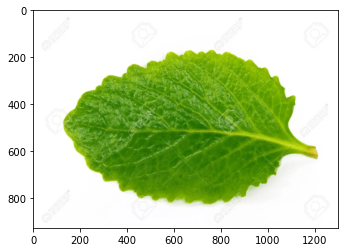

In [7]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

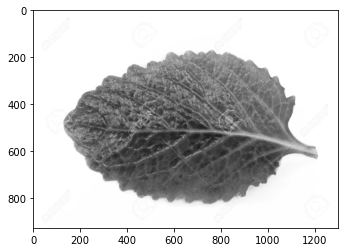

In [8]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [9]:
gs.shape

(928, 1300)

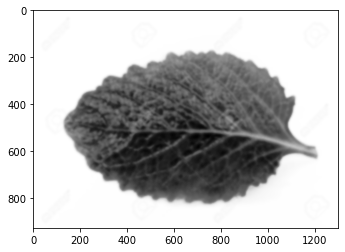

In [10]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

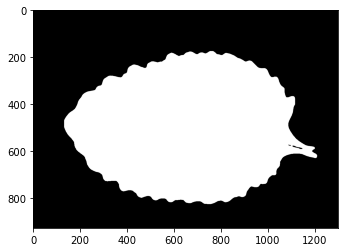

In [11]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

In [12]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

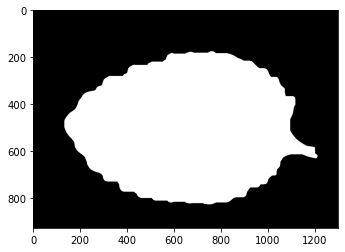

In [13]:
plt.imshow(closing,cmap='Greys_r')

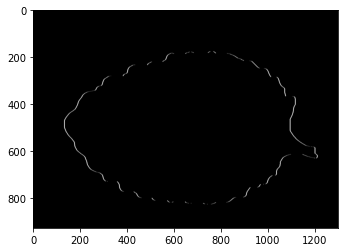

In [14]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

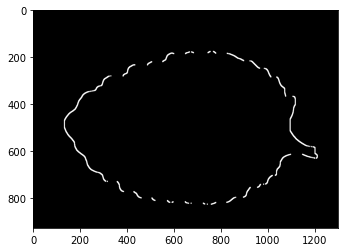

In [15]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

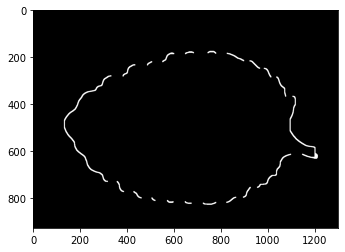

In [16]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

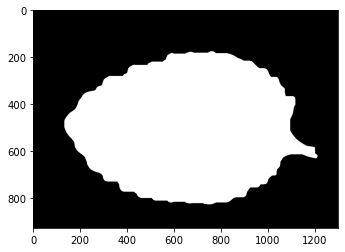

In [17]:
plt.imshow(closing,cmap="Greys_r")

In [18]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
len(contours)

1

In [20]:
cnt = contours[0]
len(cnt)

1007

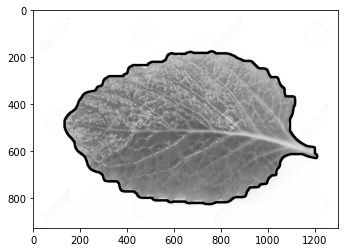

In [21]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

In [22]:
M = cv2.moments(cnt)
M

{'m00': 483641.0,
 'm10': 317752524.6666666,
 'm01': 243586076.0,
 'm20': 237576303517.8333,
 'm11': 159614804554.66666,
 'm02': 134935463190.83333,
 'm30': 193529964957115.62,
 'm21': 119109094833315.5,
 'm12': 88447420842404.86,
 'm03': 80293039761947.0,
 'mu20': 28812640114.522644,
 'mu11': -421442625.8795166,
 'mu02': 12253191793.086288,
 'mu30': -417712185990.71875,
 'mu21': 7425190453.783203,
 'mu12': 219233023425.29297,
 'mu03': -9940768248.15625,
 'nu20': 0.12317904529862168,
 'nu11': -0.001801740489508874,
 'nu02': 0.05238452501867448,
 'nu30': -0.002567848332891525,
 'nu21': 4.5645694733389734e-05,
 'nu12': 0.0013477154188887266,
 'nu03': -6.110998440983048e-05}

In [23]:
area = cv2.contourArea(cnt)
area

483641.0

In [24]:
perimeter = cv2.arcLength(cnt,True)
perimeter

3063.5962258577347

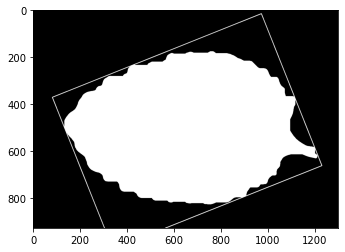

In [25]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

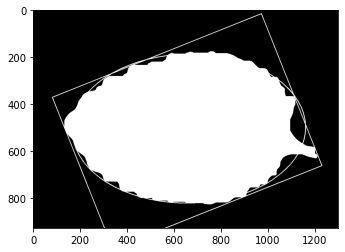

In [26]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

In [27]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.6559139784946237

In [28]:
rectangularity = w*h/area
rectangularity

1.4510308265841811

In [29]:
circularity = ((perimeter)**2)/area
circularity

19.406174900576577

In [30]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

784.7234204834585

In [31]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

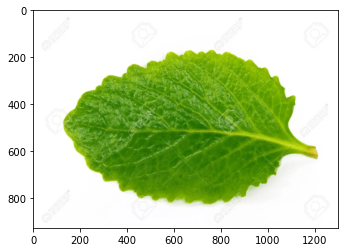

In [32]:
plt.imshow(img,cmap="Greys_r")

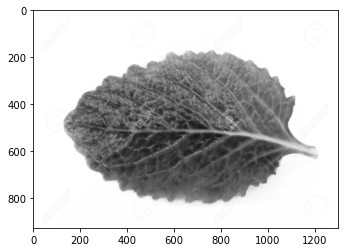

In [33]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

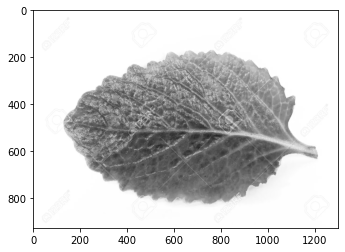

In [34]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")


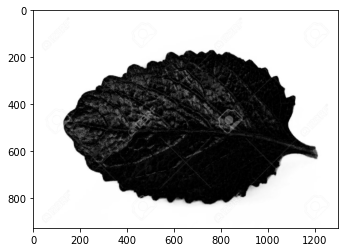

In [35]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [36]:
np.mean(blue_channel)

156.85574353448277

In [37]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [38]:
red_mean = np.mean(red_channel)
red_mean

92.62261936339523

In [39]:
green_mean = np.mean(green_channel)
green_mean

115.28051143899204

In [40]:
blue_mean = np.mean(blue_channel)
blue_mean

54.669735576923074

In [41]:
red_var = np.std(red_channel)
red_var

95.4264982118548

In [42]:
!pip install mahotas

In [43]:
import mahotas as mt

In [44]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 1.48323090e-01,  2.03057068e+02,  9.82093838e-01,  5.66983891e+03,
        6.78390294e-01,  3.86997232e+02,  2.24762986e+04,  5.30692756e+00,
        7.03525423e+00,  1.51958585e-03,  2.57386709e+00, -5.21867538e-01,
        9.96433235e-01])

In [46]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

203.05706789119864
0.9820938384751063
0.6783902935705409
7.0352542304104455
